In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from tqdm import tqdm

## Task 1

In [34]:
m0, sigma0 = 1, 1
m1, sigma1 = 5, 2
p0, p1 = 0.3, 0.7
n = 500

In [37]:
x1 = np.random.normal(m0, sigma0, n)
x2 = np.random.normal(m1, sigma1, n)
mixture_coef = np.random.binomial(1, p1, n)
X_sample = x1 * (1-mixture_coef) + x2 * mixture_coef

In [40]:
xs = np.linspace(-2, 10, 100)
true_density = p0 * norm.pdf(xs, m0, sigma0) + p1 * norm.pdf(xs, m1, sigma1)

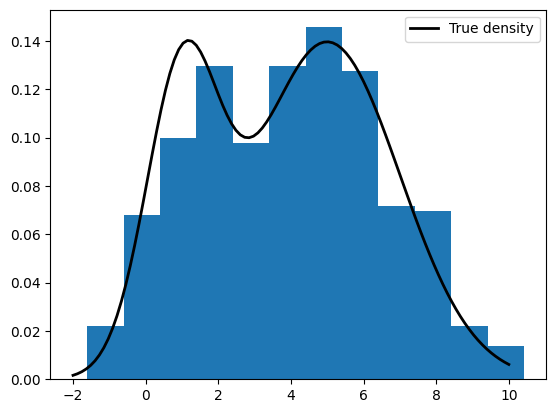

In [75]:
plt.hist(X_sample, bins=12, density=True)
plt.plot(xs, true_density, color='k', linewidth=2,label='True density')
plt.legend()
plt.show()

## c

In [67]:
def compute_gamma_hat(x, pi0_hat, pi1_hat, mu0_hat, mu1_hat, sigma0_hat, sigma1_hat):
  numerator = pi1_hat * norm(mu1_hat, sigma1_hat).pdf(x)
  denominator = pi0_hat * norm(mu0_hat, sigma0_hat).pdf(x) + pi1_hat * norm(mu1_hat, sigma1_hat).pdf(x)
  return numerator / denominator

## d

In [68]:
def compute_mu0_hat(x, gamma_hat):
  return np.sum((1 - gamma_hat) * x) / np.sum(1 - gamma_hat)

def compute_mu1_hat(x, gamma_hat):
  return np.sum((gamma_hat) * x) / np.sum(gamma_hat)

def compute_sigma0_hat(x, gamma_hat, mu0_hat):
  return np.sqrt(np.sum((1 - gamma_hat) * (x - mu0_hat) ** 2) / np.sum(1 - gamma_hat))

def compute_sigma1_hat(x, gamma_hat, mu1_hat):
  return np.sqrt(np.sum((gamma_hat) * (x - mu1_hat) ** 2) / np.sum(gamma_hat))

def compute_pi0_hat(gamma_hat):
  return np.mean(1-gamma_hat)

def compute_pi1_hat(gamma_hat):
  return np.mean(gamma_hat)

## e

In [69]:
def EM(X, N_iter):
  mu0_hat, sigma0_hat = 0, 1
  mu1_hat, sigma1_hat = 1, 1
  pi0_hat = pi1_hat = 0.5

  for i in tqdm(range(N_iter)):
    # E step
    gamma_hat = compute_gamma_hat(X, pi0_hat, pi1_hat, mu0_hat, mu1_hat, sigma0_hat, sigma1_hat)
    # M step
    mu0_hat = compute_mu0_hat(X, gamma_hat)
    mu1_hat = compute_mu1_hat(X, gamma_hat)
    sigma0_hat = compute_sigma0_hat(X, gamma_hat, mu0_hat)
    sigma1_hat = compute_sigma1_hat(X, gamma_hat, mu1_hat)
    pi0_hat = compute_pi0_hat(gamma_hat)
    pi1_hat = compute_pi1_hat(gamma_hat)

  return mu0_hat, mu1_hat, sigma0_hat, sigma1_hat, pi0_hat, pi1_hat

In [70]:
mu0_hat, mu1_hat, sigma0_hat, sigma1_hat, pi0_hat, pi1_hat = EM(X_sample,N_iter=1000)

100%|██████████| 1000/1000 [00:03<00:00, 279.05it/s]


In [60]:
mu0_hat, mu1_hat, sigma0_hat, sigma1_hat, pi0_hat, pi1_hat

(0.9900045823367046,
 5.028817122323611,
 1.0751089784189625,
 2.058266858651005,
 0.26638515600937684,
 0.7336148439906232)

In [61]:
predicted_density = pi0_hat * norm(mu0_hat, sigma0_hat).pdf(xs) + pi1_hat * norm(mu1_hat, sigma1_hat).pdf(xs)

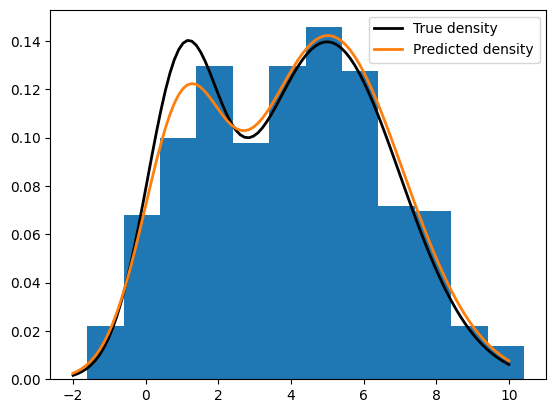

In [65]:
plt.hist(X_sample, bins=12, density=True)
plt.plot(xs, true_density, color='k', linewidth=2,label='True density')
plt.plot(xs, predicted_density, linewidth=2,label='Predicted density')
plt.legend()
plt.show()